**step 1:** installing **dependancies**

In [1]:

!pip install easyocr
!pip install imutils

     |████████████████████████████████| 63.6 MB 18 kB/s 
     |████████████████████████████████| 47.6 MB 31 kB/s 


// open cv
// import numpy
//import imutil
//importeasyocr
//import matplotlib 

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

**step 2**: read the image in **grayscale** and **blur**

in cv2 we give our input image


we change the colour scheme from bgr to grayscale and visualise it using matplotlib

or u can leave it out and use 
plt.imshow(gray) intead of
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

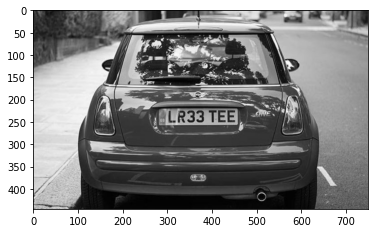

In [3]:
img = cv2.imread('image4.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

**Step 3:**
here we perform our filtering and edge detection using the **CANNY algorithm** and again use matplotlib to visualize it  

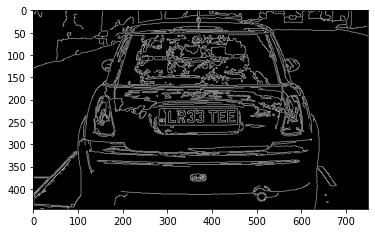

In [4]:

bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))


Step 3:
**contourin**g and **applying a mask** on the **image**

In [5]:

keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

looping through our contours values we store them in a temporary variable named location to find the actual location of licence plate in our image

In [6]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

temporary variable named location 

In [7]:

location

array([[[282, 222]],

       [[282, 257]],

       [[458, 255]],

       [[451, 219]]], dtype=int32)

**step 4**:
**masking** the image and specified our contours through the image and overlaid our required segmented image / liscence plate

In [8]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

visualisation

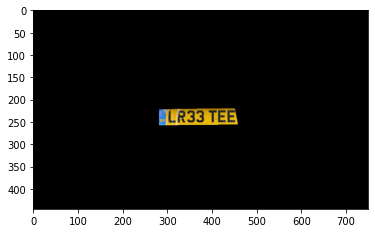

In [9]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))


cropped out the segment from our image where we obtain a set of coordinates which dont contain the black pixels that are stored in an array, we do array filtering to display the pixel that contain our liscence plate values

In [10]:

(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

visualisation

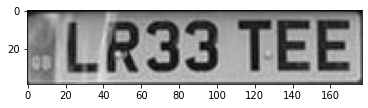

In [11]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


**Step 5:**
easyocr to read text

In [12]:

reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[13, 0], [177, 0], [177, 39], [13, 39]], 'Lr33 TEE', 0.6115425299559143)]

**Step 6:** **rendering** the result value

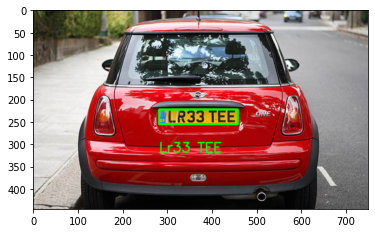

In [13]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))